In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Use seaborn sample data.（https://seaborn.pydata.org/generated/seaborn.load_dataset.html） 

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### To make the table easier to read, make it a Pivot table.

In [4]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [5]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


# Heatmap

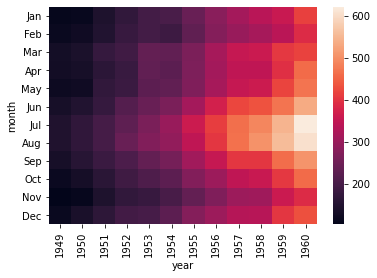

In [6]:
sns.heatmap(flight_dframe)
plt.show()

<AxesSubplot:xlabel='year', ylabel='month'>

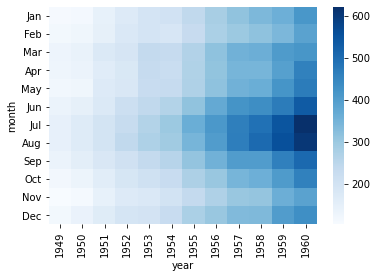

In [8]:
# Change a color
sns.heatmap(flight_dframe, cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='month'>

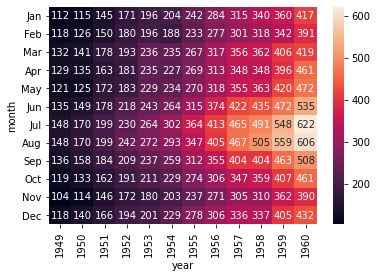

In [9]:
# Numbers can be written in.
sns.heatmap(flight_dframe, annot=True, fmt='d')

<AxesSubplot:xlabel='year', ylabel='month'>

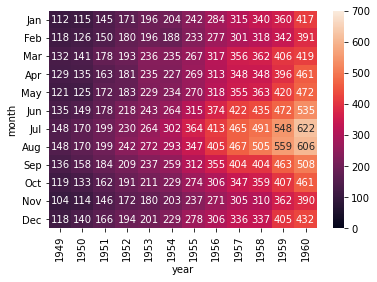

In [10]:
# Set the range of the color bar.
sns.heatmap(flight_dframe, annot=True, fmt='d', vmin=0, vmax=700)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='month'>

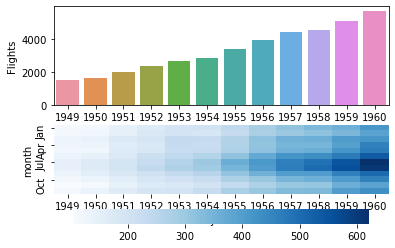

In [11]:
f, (axis1, axis2) = plt.subplots(2,1) 

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})

# Clustering

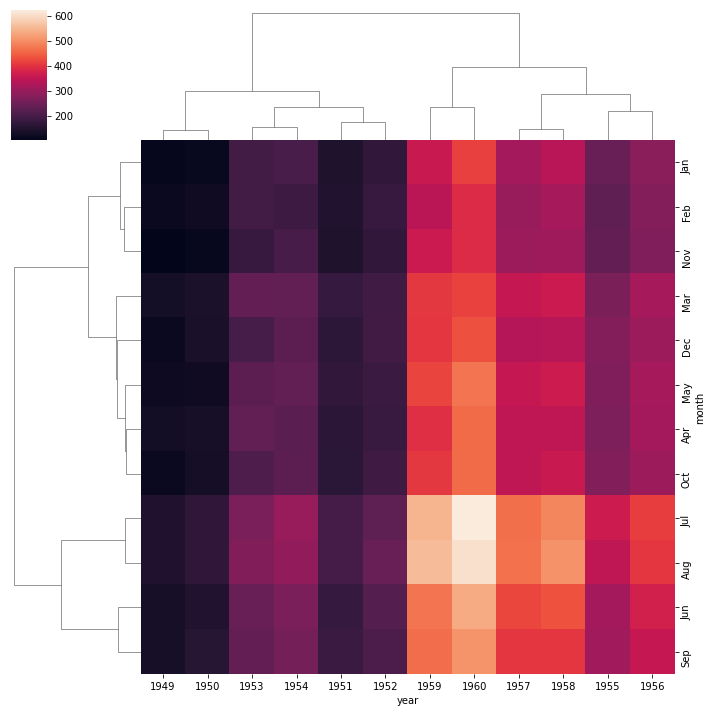

In [12]:
sns.clustermap(flight_dframe)

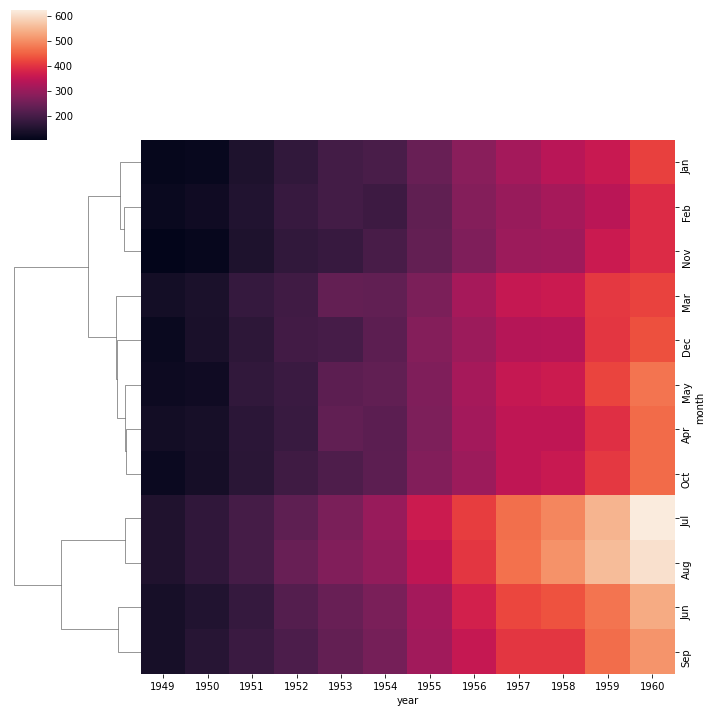

In [14]:
#No clustering in the column direction.
sns.clustermap(flight_dframe, col_cluster=False)

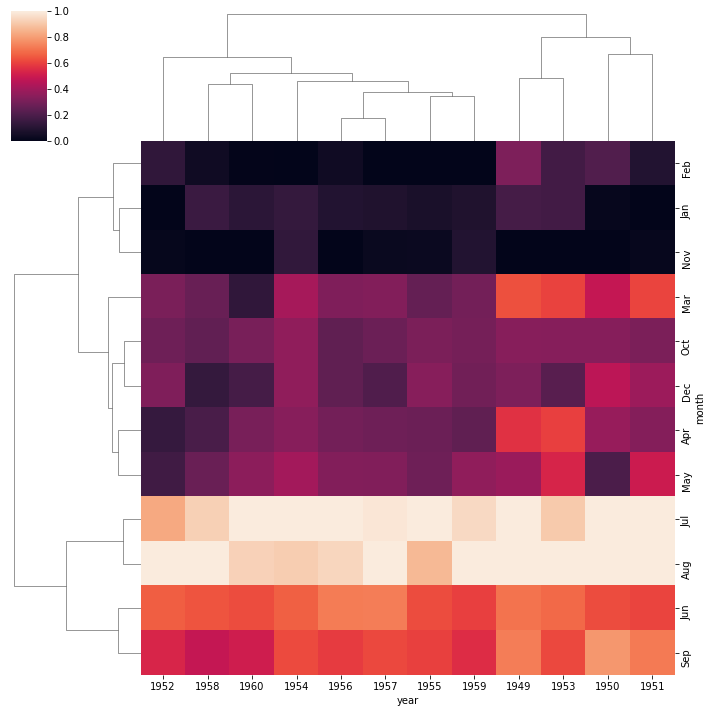

In [16]:
#Data standardization.
#Differences between years will be eliminated.
sns.clustermap(flight_dframe, standard_scale=1)

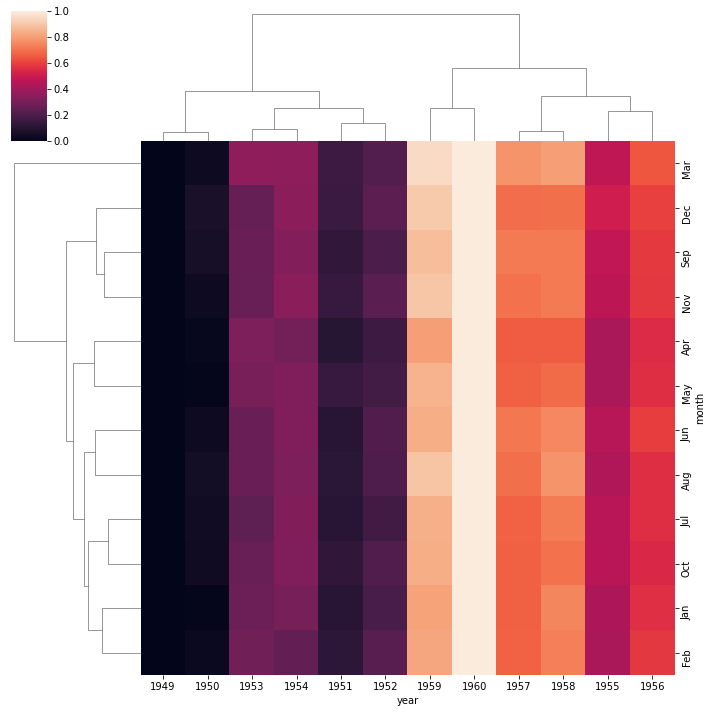

In [18]:
#Differences from month to month will be eliminated.
sns.clustermap(flight_dframe, standard_scale=0)

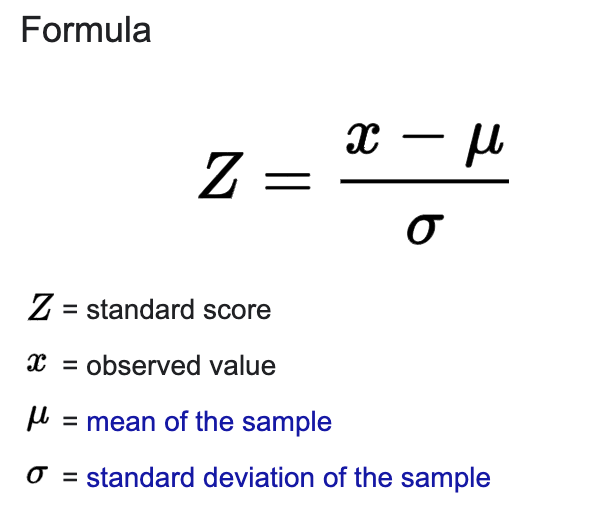

In [20]:
#Z-scores are used to identify trends by column.
from PIL import Image

im = Image.open("./z-score.jpg")
im

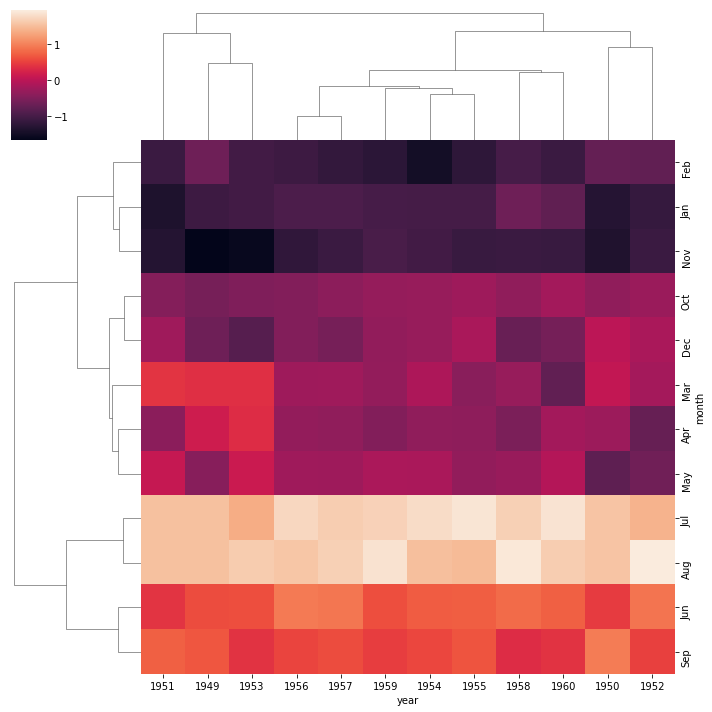

In [21]:
sns.clustermap(flight_dframe, z_score=1)

## fin.